# Initial Dataset Exploration

In [2]:
import sys
import os
import importlib


In [3]:
# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))

In [4]:
# Import functionality from our source code
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import load_data, get_numerical_features, get_categorical_features

In [5]:
# Load the data
df = load_data()

Loading data from /Users/nando/Documents/GitHub/Credit_Score_Classification/data/raw/credit_score_dataset.csv
Loaded dataset with 100000 rows and 27 columns


In [6]:
# Display the first 5 rows of the dataset for a quick glance
print("\nFirst 5 Rows of the Dataset:\n")
df.head()


First 5 Rows of the Dataset:



,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529544,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.2802216,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.69952126,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580744,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.42015309,3


In [7]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

Dataset Shape: 100000 rows, 27 columns



In [8]:
# Display dataset information in a readable format
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate          

In [9]:
list_numerical_features = get_numerical_features(df)

print("\nNumeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


Numeric columns:
Age: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Delay_from_due_date: float64
Num_Credit_Inquiries: float64
Credit_Utilization_Ratio: float64
Credit_Score: int64


In [10]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
ID: object
Customer_ID: object
Month: object
Name: object
City: object
Street: object
SSN: object
Occupation: object
Annual_Income: object
Num_of_Loan: object
Type_of_Loan: object
Num_of_Delayed_Payment: object
Changed_Credit_Limit: object
Credit_Mix: object
Outstanding_Debt: object
Credit_History_Age: object
Payment_of_Min_Amount: object
Amount_invested_monthly: object


We identified columns that should be numeric

# Preprocessing part

## Categorical features

In [11]:
import src.preprocessing.categorical.categorical_features as categorical_features
importlib.reload(categorical_features)
from src.preprocessing.categorical.categorical_features import *

In [12]:
visualize_unique_categories(df, list_categorical_features);


Column 'ID' (90058 uniques):
the length of the list is too long to be printed entirely. Sample:
['0x1603', '0x1604', '0x1605', '0x1607', '0x1608', '0x1609', '0x160e', '0x160f', '0x1610', '0x1611']

Column 'Customer_ID' (12500 uniques):
the length of the list is too long to be printed entirely. Sample:
['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb', 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08']

Column 'Month' (8 uniques):
['February', 'April', 'May', 'June', 'July', 'August', 'January', 'March']

Column 'Name' (10139 uniques):
the length of the list is too long to be printed entirely. Sample:
['Aaron Maashoh', 'Rick Rothackerj', 'Langep', 'Jasond', 'Deepaa', 'Np', 'Nadiaq', 'Annk', 'Charlie Zhur', 'Jamesj']

Column 'City' (4 uniques):
['Lonton', 'Standhampton', 'BadShire', 'ZeroVille']

Column 'Street' (31 uniques):
['Oxford Street', 'Old Street', 'Downing Street', 'Jubilee Street', 'Elm Street', 'Market Street', 'King Street', 'Abbey Driv

### Drop Identifiers Columns

In [13]:
IDENTIFIERS_TO_DROP = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN'
]

# drop the columns that are purely identifiers and that can add bias to the model
df = df.drop(columns=IDENTIFIERS_TO_DROP)

### Handle "Street" feature

In [14]:
df = add_space_before_word(df, feature_column='Street', separator_word='Street')

### Handle "Credit History Age" feature

In [15]:
print("Credit_History_Age information before parsing:")
df["Credit_History_Age"].info()

print("\n"+"-"*100+"\n")

df["Credit_History_Age"] = df["Credit_History_Age"].apply(parse_string_time_period)

print("Credit_History_Age information after parsing:")
df["Credit_History_Age"].info()

Credit_History_Age information before parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype 
--------------  ----- 
81791 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB

----------------------------------------------------------------------------------------------------

Credit_History_Age information after parsing:
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count  Dtype  
--------------  -----  
81791 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


### Handle "Type of Loan" feature - Converting in Multiple Binary Numeric Features

In [16]:
# ANOTHER IDEA COULD BE TO LEAVE THE FEATURE AS IT IS, AND ONLY AFTER HANDLING MISSING VALUES, 
# MOVING THIS CELL IN THE SECTION REGARDING THE ENCODING OT CATEGORICAL FEATURES


In [17]:
# Handling Type of Loan feature
original_count_unique_categories = df['Type_of_Loan'].nunique()

visualize_top_n_categories(df, column='Type_of_Loan', top_n=25);

df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Missing_Loan')

unique_loan_types_and_counts = get_unique_values_and_counts(df, column='Type_of_Loan')

# Print the discovered loan types and their frequencies
print(f"Discovered {len(unique_loan_types_and_counts)} unique values")
for unique_value, count in list(unique_loan_types_and_counts.items()): 
    print(f"- {unique_value}: {count:,} occurrences")


df = transform_to_binary_features(df, column='Type_of_Loan', unique_values=unique_loan_types_and_counts.keys(), feature_name='Loan')


# add "Loan" suffix to the column "Has_Not_Specified" for better readability
df.rename(columns={'Has_Not_Specified': 'Has_Not_Specified_Loan'}, inplace=True)

# Verify the transformation
print(f"\nOriginal unique values:", {original_count_unique_categories})
print("\nBinary Features (numeric) created from the categories of 'Type of Loan':")
for col in [c for c in df.columns if c.startswith('Has_')]:
    print(f"- {col}: {df[col].sum():,} records - type: {df[col].dtype}")


# Drop the original Type_of_Loan column
df.drop(columns=['Type_of_Loan'], inplace=True)





Top 25 Categories (out of 6261 unique values):
Total records analyzed: 100000

Detailed breakdown:
 1. Missing                                                                20,312 records (20.31%)
 2. Not Specified                                                           1,272 records (1.27%)
 3. Credit-Builder Loan                                                     1,143 records (1.14%)
 4. Debt Consolidation Loan                                                 1,133 records (1.13%)
 5. Personal Loan                                                           1,128 records (1.13%)
 6. Student Loan                                                            1,117 records (1.12%)
 7. Payday Loan                                                             1,061 records (1.06%)
 8. Mortgage Loan                                                           1,058 records (1.06%)
 9. Auto Loan                                                               1,024 records (1.02%)
10. Home Equity L

### Handle object columns with problematic-numeric values and convert to numeric

In [18]:
import src.preprocessing.categorical.problematic_numeric_values as problematic_numeric_values
importlib.reload(problematic_numeric_values)
from src.preprocessing.categorical.problematic_numeric_values import convert_non_numeric_strings_to_nan, identify_problematic_characters,  remove_characters, convert_to_numeric

In [19]:
# Features that should be numerical but are currently 'object'

PROBLEMATIC_NUMERICAL_FEATURES = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly'
]

# Print info of the columns before cleaning and conversion to numeric
print("\nInfo for columns to be converted to numeric:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()

# Convert strings that don't contain digits to NaN
df = convert_non_numeric_strings_to_nan(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Identify problematic elements in the columns
print("Identifying problematic characters...\n")
problematic_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nProblematic characters found: {problematic_characters}")

print(f"\nRemoving problematic characters: {problematic_characters}")
df = remove_characters(df, PROBLEMATIC_NUMERICAL_FEATURES, problematic_characters)

non_numeric_characters = identify_problematic_characters(df, PROBLEMATIC_NUMERICAL_FEATURES)
print(f"\nNon-numeric characters found after cleaning: {non_numeric_characters}")

print("\nConverting to numeric...")
df = convert_to_numeric(df, PROBLEMATIC_NUMERICAL_FEATURES)

# Print info of the converted columns
print("\nInfo for numeric converted columns:")
print("-" * 50)
df[PROBLEMATIC_NUMERICAL_FEATURES].info()


Info for columns to be converted to numeric:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Annual_Income            89906 non-null  object
 1   Num_of_Loan              89809 non-null  object
 2   Num_of_Delayed_Payment   83782 non-null  object
 3   Changed_Credit_Limit     89933 non-null  object
 4   Outstanding_Debt         90037 non-null  object
 5   Amount_invested_monthly  85880 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB
Identifying problematic characters...


Column 'Annual_Income': 6292 values with problematic characters
--------------------------------------------------
Example 1: '34847.84_'
Example 2: '30689.89_'
Example 3: '35547.71_'

Column 'Num_of_Loan': 4267 values with problematic characters
-------------------------------------------

### Remaining categorical features

In [20]:
list_categorical_features = get_categorical_features(df)

print("\nCategorical columns:")
for col in list_categorical_features:
    print(f"{col}: {df[col].dtype}")


Categorical columns:
Month: object
City: object
Street: object
Occupation: object
Credit_Mix: object
Payment_of_Min_Amount: object


## Numeric Features (addressing constraints)

In [21]:
import src.preprocessing.numeric_features as numeric_features
importlib.reload(numeric_features)
from src.preprocessing.numeric_features import *

In [22]:
list_numerical_features = get_numerical_features(df)

print("\nNumeric columns:")
for col in list_numerical_features:
    print(f"{col}: {df[col].dtype}")


Numeric columns:
Age: float64
Annual_Income: float64
Monthly_Inhand_Salary: float64
Num_Bank_Accounts: float64
Num_Credit_Card: float64
Interest_Rate: float64
Num_of_Loan: float64
Delay_from_due_date: float64
Num_of_Delayed_Payment: float64
Changed_Credit_Limit: float64
Num_Credit_Inquiries: float64
Outstanding_Debt: float64
Credit_Utilization_Ratio: float64
Credit_History_Age: float64
Amount_invested_monthly: float64
Credit_Score: int64
Has_Payday_Loan: int64
Has_Credit_Builder_Loan: int64
Has_Not_Specified_Loan: int64
Has_Home_Equity_Loan: int64
Has_Mortgage_Loan: int64
Has_Personal_Loan: int64
Has_Student_Loan: int64
Has_Debt_Consolidation_Loan: int64
Has_Auto_Loan: int64
Has_Missing_Loan: int64


In [23]:
# Identify loan-related columns
loan_columns = [col for col in df.columns if 'Has' in col and 'Loan' in col]
print(f"\nLoan-related columns identified ({len(loan_columns)}):")

df_copy = df.copy()

# Create a separate dataframe for loan-related columns
# This preserves the original index for later merging if needed
df_loans = df_copy[loan_columns]

# Create a dataframe without loan-related columns
df_no_loans = df_copy.drop(columns=loan_columns)
print(f"Non-loans dataframe shape: {df_no_loans.shape}")




Loan-related columns identified (10):
Non-loans dataframe shape: (100000, 22)


In [24]:
# Define constraints by feature
CONSTRAINTS = {
    'Age': {'min': 10, 'max': 120, 'integer': True},
    
    'Annual_Income': {'min': 0, 'max': None, 'integer': False}, 
    
    'Monthly_Inhand_Salary': {'min': 0, 'max': None, 'integer': False}, 

    'Num_Bank_Accounts': {'min': 0, 'max': 50, 'integer': True},

    'Num_Credit_Card': {'min': 0, 'max': 50, 'integer': True},

    'Interest_Rate': {'min': 0, 'max': 100, 'integer': False},
    
    'Num_of_Loan': {'min': 0, 'max': 50, 'integer': True},
    
    'Delay_from_due_date': {'min': 0, 'max': 180, 'integer': True},
    
    'Num_of_Delayed_Payment': {'min': 0, 'max': None, 'integer': True}, 
   
    'Changed_Credit_Limit': {'min': None, 'max': None, 'integer': False}, 
   
    'Num_Credit_Inquiries': {'min': 0, 'max': 50, 'integer': True},
    
    'Outstanding_Debt': {'min': 0, 'max': None, 'integer': False},

    'Credit_Utilization_Ratio': {'min': 0, 'max': 100, 'integer': False},
    
    'Credit_History_Age': {'min': 0, 'max': 110, 'integer': False},

    'Amount_invested_monthly': {'min': 0, 'max': None, 'integer': False}, 

    'Credit_Score': {'min': 0, 'max': 3, 'integer': True}
}


numeric_features_before = get_numerical_features(df_no_loans)
print("\nNumeric columns Statistics - Before Setting Constraints:\n")
for col in numeric_features_before:
    print(f"{col}: {df_no_loans[col].describe()}\n")
print("\n"+"-"*100+"\n")

print("Setting constraints for numeric features...\n")
df_no_loans = set_constraints_for_numeric_features(df_no_loans, numeric_features_before, CONSTRAINTS)


numeric_features_after = get_numerical_features(df_no_loans)
print("\n"+"-"*100+"\n")
print("\nNumeric columns Statistics - After Setting Constraints:\n")
for col in numeric_features_after:
    print(f"{col}: {df_no_loans[col].describe()}\n")

# Merge back with the dataframe containing loans binary columns
df = pd.concat([df_no_loans, df_loans], axis=1)


Numeric columns Statistics - Before Setting Constraints:

Age: count    85512.000000
mean       110.226845
std        684.907588
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64



Annual_Income: count    8.990600e+04
mean     1.765448e+05
std      1.429013e+06
min      7.005930e+03
25%      1.945305e+04
50%      3.757975e+04
75%      7.276004e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Monthly_Inhand_Salary: count    76405.000000
mean      4185.789272
std       3178.560506
min        303.645417
25%       1625.023750
50%       3086.683333
75%       5940.317500
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

Num_Bank_Accounts: count    90167.000000
mean        17.105172
std        117.728215
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

Num_Credit_Card: count    89938.000000
mean        22.449410
std        129.037233
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

Interest_Rate: count    90151.000000
mean        72.343923
s

# Creation of a dummy dataset

In [25]:
dummy_dataset = df.select_dtypes(include=[np.number])

dummy_dataset.info()

dummy_dataset = dummy_dataset.dropna(axis=0, how='any').reset_index(drop=True)

dummy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          83110 non-null   float64
 1   Annual_Income                89906 non-null   float64
 2   Monthly_Inhand_Salary        76405 non-null   float64
 3   Num_Bank_Accounts            88994 non-null   float64
 4   Num_Credit_Card              87947 non-null   float64
 5   Interest_Rate                88343 non-null   float64
 6   Num_of_Loan                  85924 non-null   float64
 7   Delay_from_due_date          89479 non-null   float64
 8   Num_of_Delayed_Payment       83206 non-null   float64
 9   Changed_Credit_Limit         88058 non-null   float64
 10  Num_Credit_Inquiries         86634 non-null   float64
 11  Outstanding_Debt             90037 non-null   float64
 12  Credit_Utilization_Ratio     90025 non-null   float64
 13  

the dummy dataset created has only 10937 rows (because i removed all the missing values for each different feature) compared to the 100 000 rows from the original one. 

In [26]:
# The following script is only for saving the dummy dataset on the folder data / dummy_dataset (leave it commented)

'''
import pathlib

script_dir = pathlib.Path.cwd()
project_root = script_dir.parent

# 4) Build the path to data/dummy_dataset
save_dir = project_root / 'data' / 'dummy_dataset'
save_dir.mkdir(parents=True, exist_ok=True)         # just in case


# Save to CSV
save_path = save_dir / 'dummy_dataset.csv'
dummy_dataset.to_csv(save_path, index=False)
print(f"Saved Dummy Dataset to {save_path}")

'''

'\nimport pathlib\n\nscript_dir = pathlib.Path.cwd()\nproject_root = script_dir.parent\n\n# 4) Build the path to data/dummy_dataset\nsave_dir = project_root / \'data\' / \'dummy_dataset\'\nsave_dir.mkdir(parents=True, exist_ok=True)         # just in case\n\n\n# Save to CSV\nsave_path = save_dir / \'dummy_dataset.csv\'\ndummy_dataset.to_csv(save_path, index=False)\nprint(f"Saved Dummy Dataset to {save_path}")\n\n'

## Missing Values Handling

In [27]:
import src.preprocessing.missing_values.missing_values_processing as missing_values
importlib.reload(missing_values)
from src.preprocessing.missing_values.missing_values_processing import *

### Handle Missing values for categorical features

In [28]:
visualize_proportion_of_unique_categories(df, list_categorical_features)


Column 'Month' has 9 unique categories:

All categories (proportion) for column 'Month':

April: 11.32%
May: 11.32%
June: 11.28%
February: 11.25%
July: 11.24%
January: 11.24%
August: 11.22%
March: 11.19%
Missing: 9.94%

----------------------------------------------------------------------------------------------------


Column 'City' has 5 unique categories:

All categories (proportion) for column 'City':

Standhampton: 47.74%
BadShire: 26.07%
Lonton: 16.02%
Missing: 9.85%
ZeroVille: 0.32%

----------------------------------------------------------------------------------------------------


Column 'Street' has 32 unique categories:

Showing top 10 most frequent categories (proportion) for column 'Street':

Missing: 9.92%
Quality Street: 5.34%
Memory Street: 5.17%
Fleet Street: 5.15%
High Street: 5.05%
Jubilee Street: 5.00%
Old Street: 4.96%
Grove Street: 4.88%
New Street: 4.85%
Pine Street: 4.83%

--------------------------------------------------------------------------------------

In [29]:
# Define imputation methods by feature

# My idea was to use an unknown category in the case from my domain knowledge 
# i know that the categories for a feature are possibly not all present 
# and that the unknown category could be a good representation of the missing categories,
# but ensuring that this new category would not strongly skew the distribution of the feature categories

# THE ONLY CONCERN IS FOR VARIABLES Credit_Mix AND Payment_of_Min_Amount, 
# WHICH HAVE 2 PLACEHOLDERS FOR WHICH I COULD MERGE THE MISSING CATEGORY
# --> TRAIN THE MODEL IN BOTH WAYS AND THEN CHECK THE PERFORMANCE (SETTING AS HYPERPARAMETERS)

# ALSO DEPENDING THE TYPE OF ENCODING YOU COULD CHECK THE "CATEGORIES CORRELATION" MAYBE ???

IMPUTATION_METHODS = {  # keep this dictionary for now in case you apply different imputations 
    
    'Month': 'unknown_category',

    'City': 'unknown_category',

    'Street': 'unknown category',

    'Occupation': 'unknown_category',

    'Credit_Mix': 'unknown_category',

    'Payment_of_Min_Amount': 'unknown_category', 
} 


df[list_categorical_features] = df[list_categorical_features].fillna('Unknown')

### Handle Missing values for numeric features

In [30]:
import src.preprocessing.missing_values.knn_imputation as knn_imputation
importlib.reload(knn_imputation)
from src.preprocessing.missing_values.knn_imputation import *

In [31]:
# Analyze missing values for numeric features
missing_stats_for_num_features = analyze_missing_values(df[list_numerical_features])
print("\nMissing Value Statistics for Numerical features:\n")
print(missing_stats_for_num_features)

Total features with missing values: 15

Missing Value Statistics for Numerical features:

                          Missing Count  Missing Percentage Data Type
Monthly_Inhand_Salary             23595               23.60   float64
Credit_History_Age                18209               18.21   float64
Age                               16890               16.89   float64
Num_of_Delayed_Payment            16794               16.79   float64
Amount_invested_monthly           14120               14.12   float64
Num_of_Loan                       14076               14.08   float64
Num_Credit_Inquiries              13366               13.37   float64
Num_Credit_Card                   12053               12.05   float64
Changed_Credit_Limit              11942               11.94   float64
Interest_Rate                     11657               11.66   float64
Num_Bank_Accounts                 11006               11.01   float64
Delay_from_due_date               10521               10.52   float64


In [32]:
# Randomly select 10000 rows from the original dataset
dummy_dataset = df.sample(n=10000, random_state=42)

# Keep only numeric columns
dummy_dataset = dummy_dataset.select_dtypes(include=[np.number])

dummy_dataset.info()

# Analyze missing values for numeric features
missing_stats_for_num_features = analyze_missing_values(dummy_dataset[list_numerical_features])
print("\nMissing Value Statistics for Numerical features:\n")
print(missing_stats_for_num_features)


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 75721 to 74479
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          8346 non-null   float64
 1   Annual_Income                9012 non-null   float64
 2   Monthly_Inhand_Salary        7639 non-null   float64
 3   Num_Bank_Accounts            8876 non-null   float64
 4   Num_Credit_Card              8814 non-null   float64
 5   Interest_Rate                8878 non-null   float64
 6   Num_of_Loan                  8654 non-null   float64
 7   Delay_from_due_date          8986 non-null   float64
 8   Num_of_Delayed_Payment       8329 non-null   float64
 9   Changed_Credit_Limit         8824 non-null   float64
 10  Num_Credit_Inquiries         8699 non-null   float64
 11  Outstanding_Debt             9083 non-null   float64
 12  Credit_Utilization_Ratio     8982 non-null   float64
 13  Credit_History_Ag

In [33]:
num_columns_with_missing = missing_stats_for_num_features.index.tolist()

for col in dummy_dataset[num_columns_with_missing]:
    print(df[col].describe())

count    76405.000000
mean      4185.789272
std       3178.560506
min        303.645417
25%       1625.023750
50%       3086.683333
75%       5940.317500
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64
count    81791.000000
mean        18.429578
std          8.311059
min          0.083333
25%         12.000000
50%         18.250000
75%         25.166667
max         33.666667
Name: Credit_History_Age, dtype: float64
count    83206.000000
mean        31.267697
std        227.136078
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4388.000000
Name: Num_of_Delayed_Payment, dtype: float64
count    83110.000000
mean        33.333738
std         10.802157
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max        118.000000
Name: Age, dtype: float64
count    85880.000000
mean       636.146662
std       2041.263519
min          0.000000
25%         74.398846
50%        135.672601
75%     

Evaluating KNN imputation method for 15 numeric columns

Evaluating KNN imputation (k = 3) for column 'Monthly_Inhand_Salary'



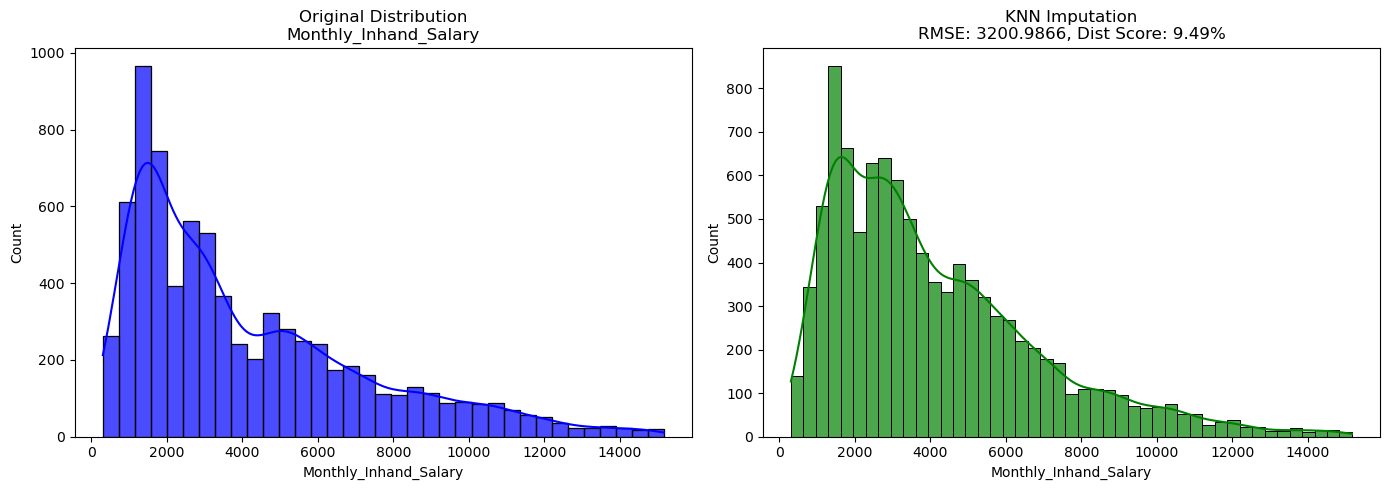


Evaluating KNN imputation (k = 3) for column 'Credit_History_Age'



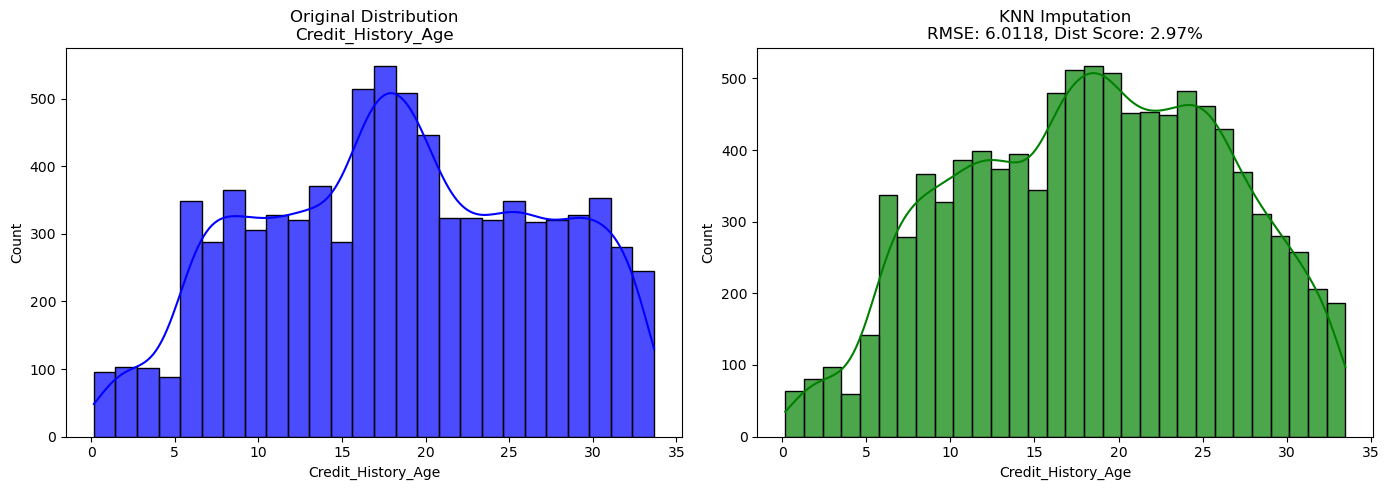


Evaluating KNN imputation (k = 3) for column 'Num_of_Delayed_Payment'



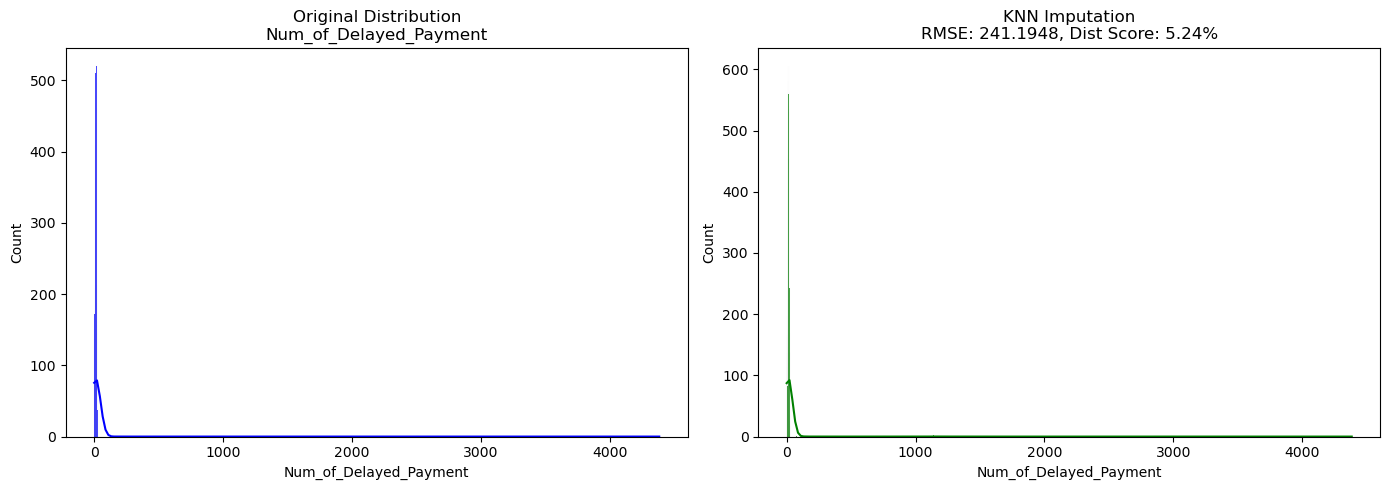


Evaluating KNN imputation (k = 3) for column 'Age'



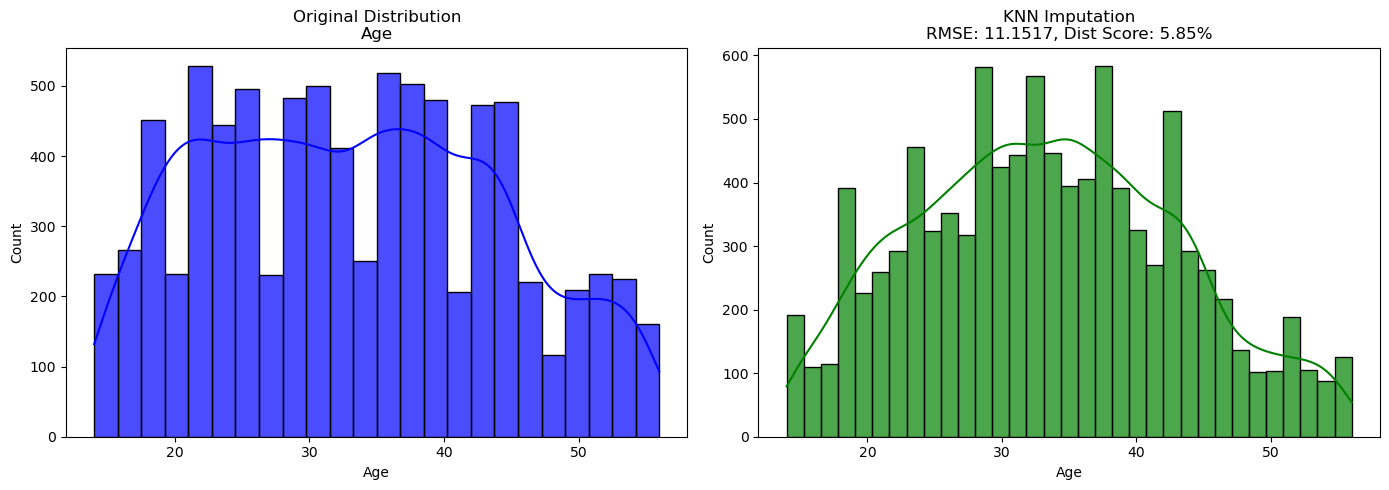


Evaluating KNN imputation (k = 3) for column 'Amount_invested_monthly'



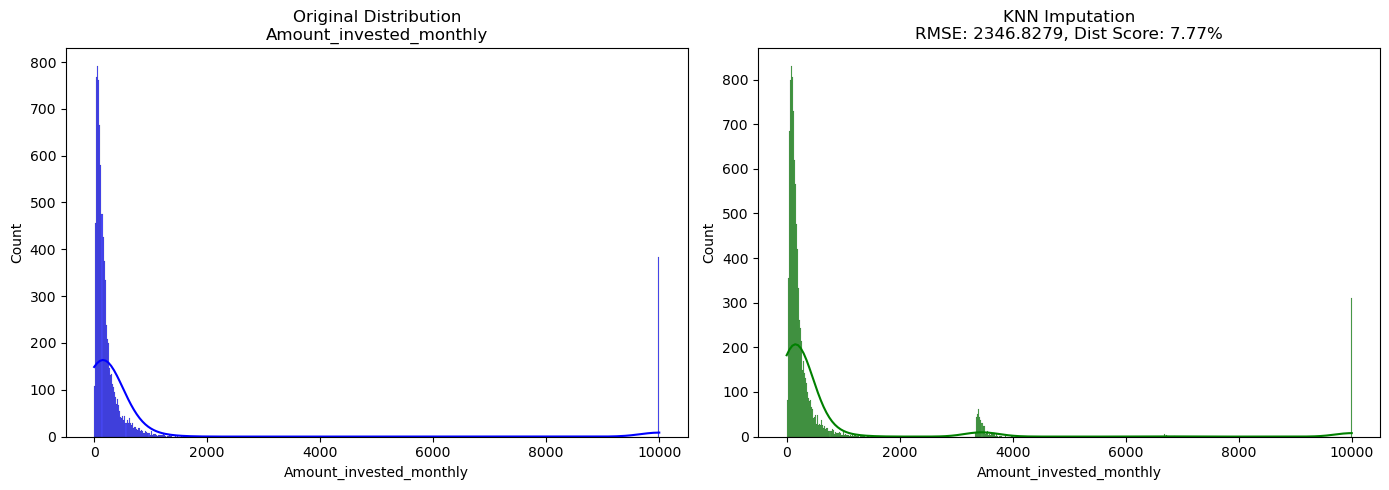


Evaluating KNN imputation (k = 3) for column 'Num_of_Loan'



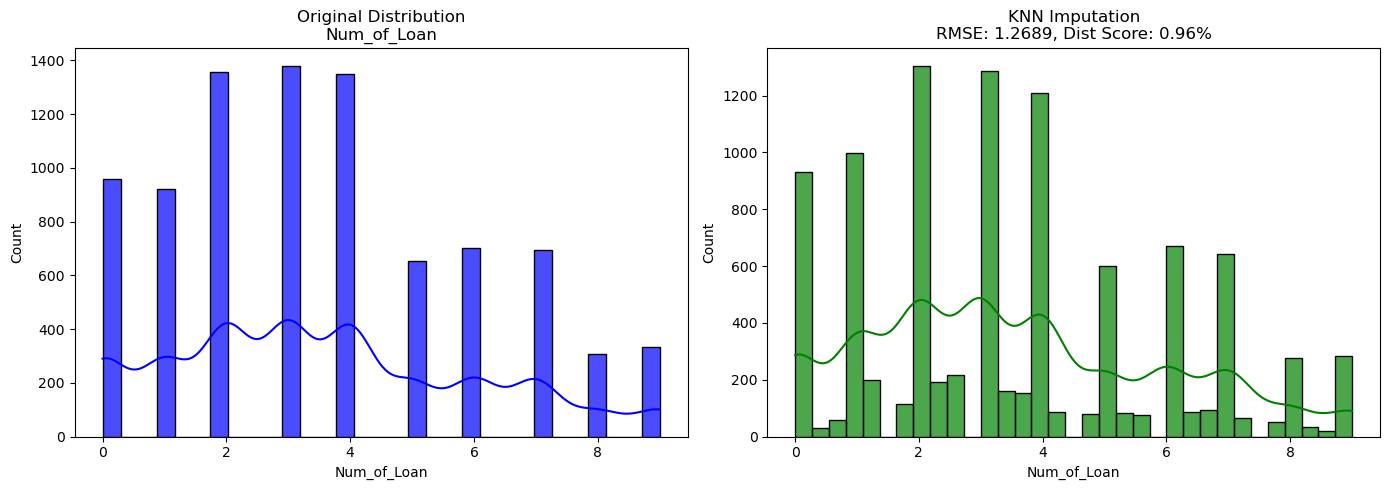


Evaluating KNN imputation (k = 3) for column 'Num_Credit_Inquiries'



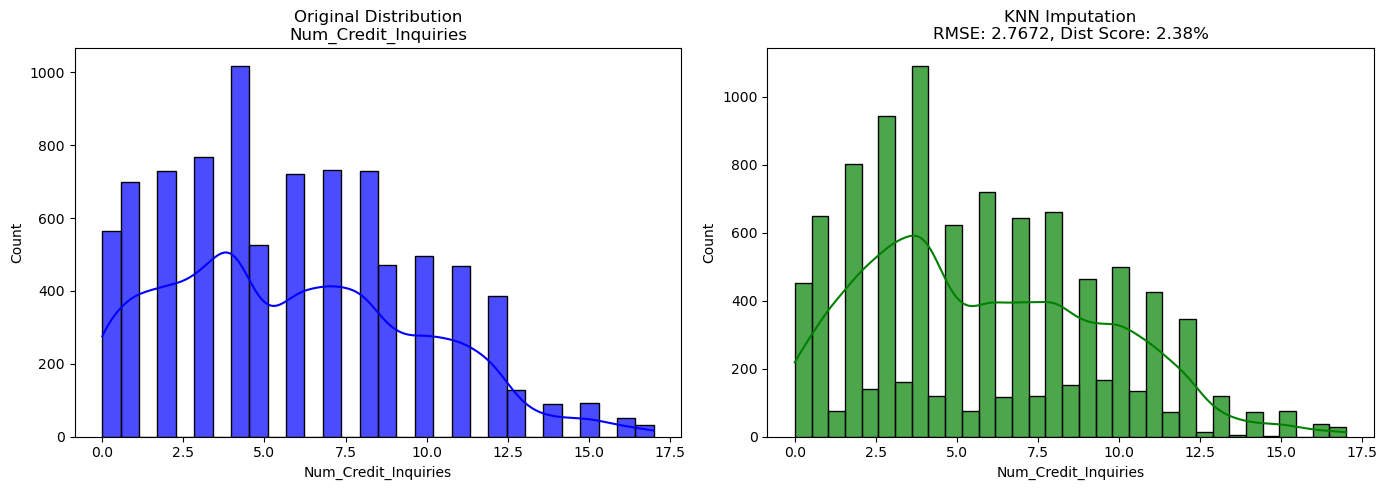


Evaluating KNN imputation (k = 3) for column 'Num_Credit_Card'



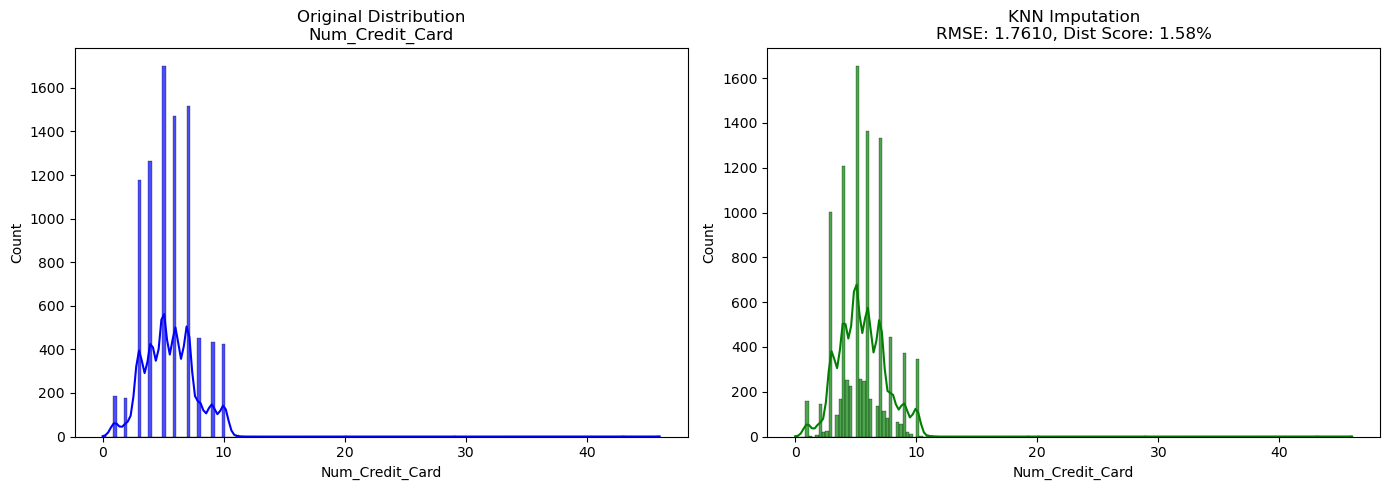


Evaluating KNN imputation (k = 3) for column 'Changed_Credit_Limit'



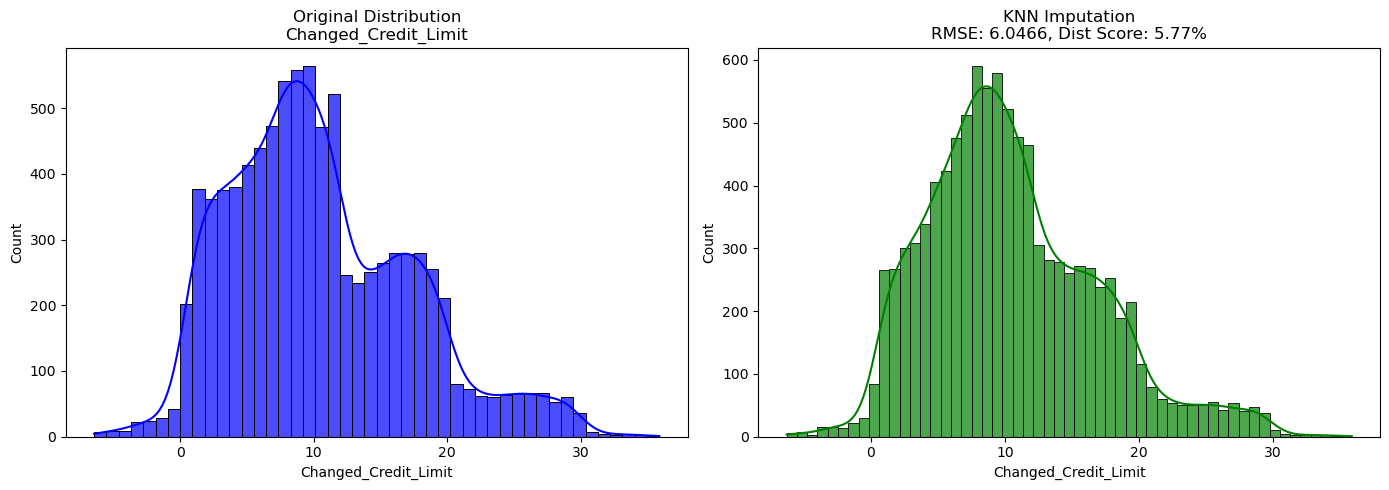


Evaluating KNN imputation (k = 3) for column 'Num_Bank_Accounts'



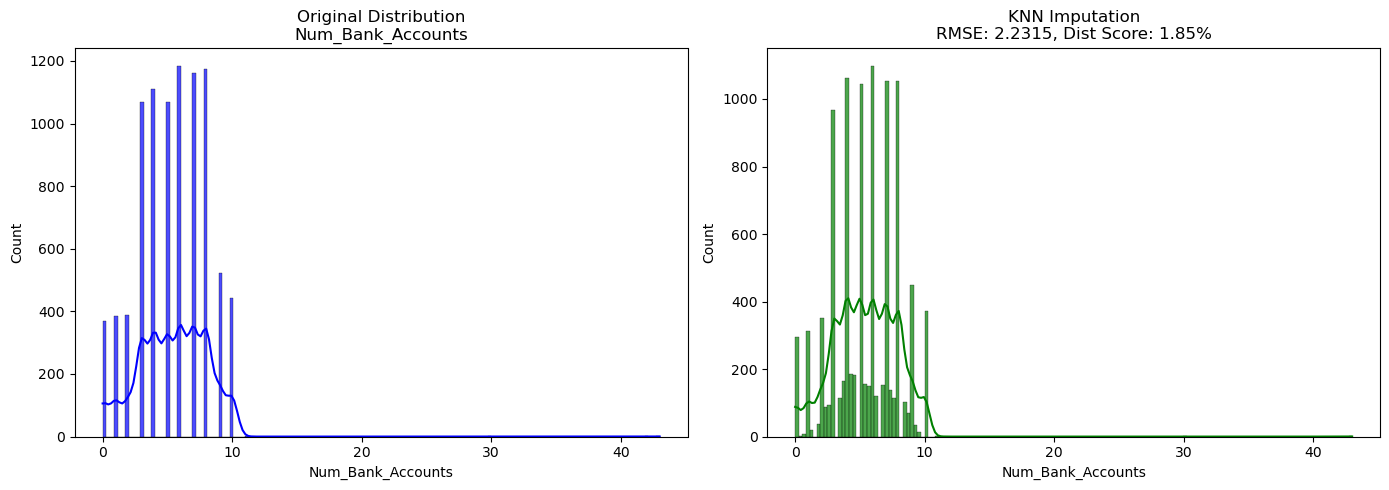


Evaluating KNN imputation (k = 3) for column 'Interest_Rate'



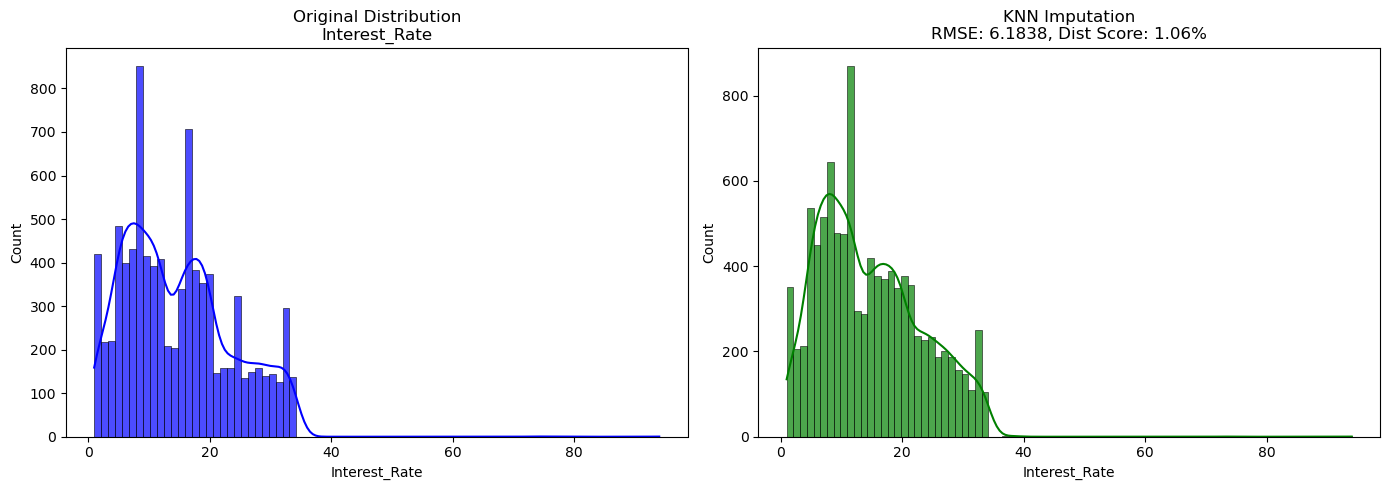


Evaluating KNN imputation (k = 3) for column 'Credit_Utilization_Ratio'



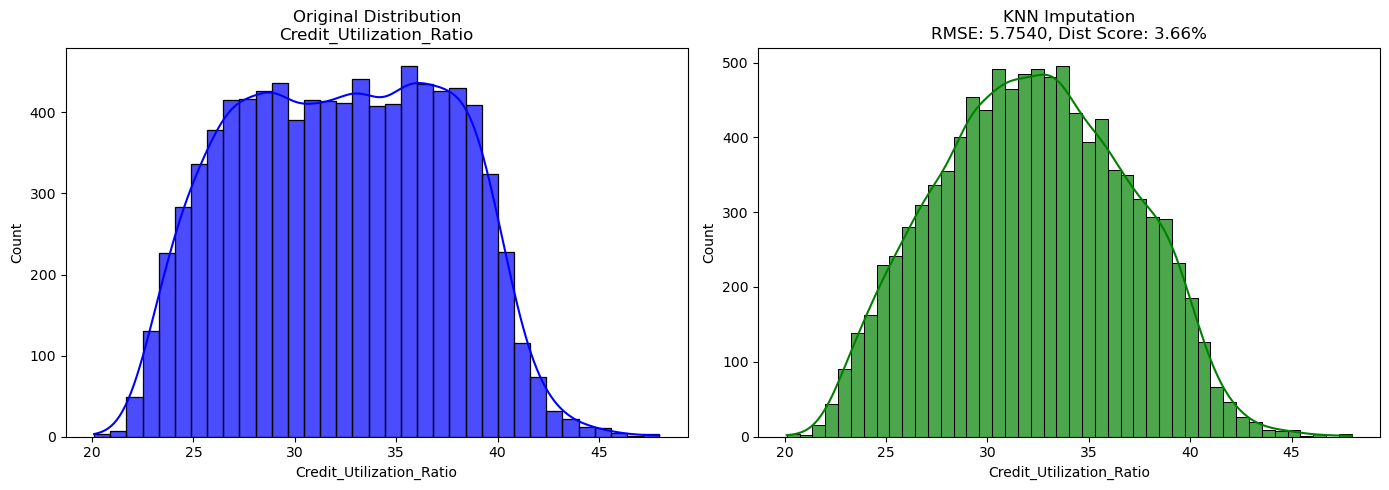


Evaluating KNN imputation (k = 3) for column 'Delay_from_due_date'



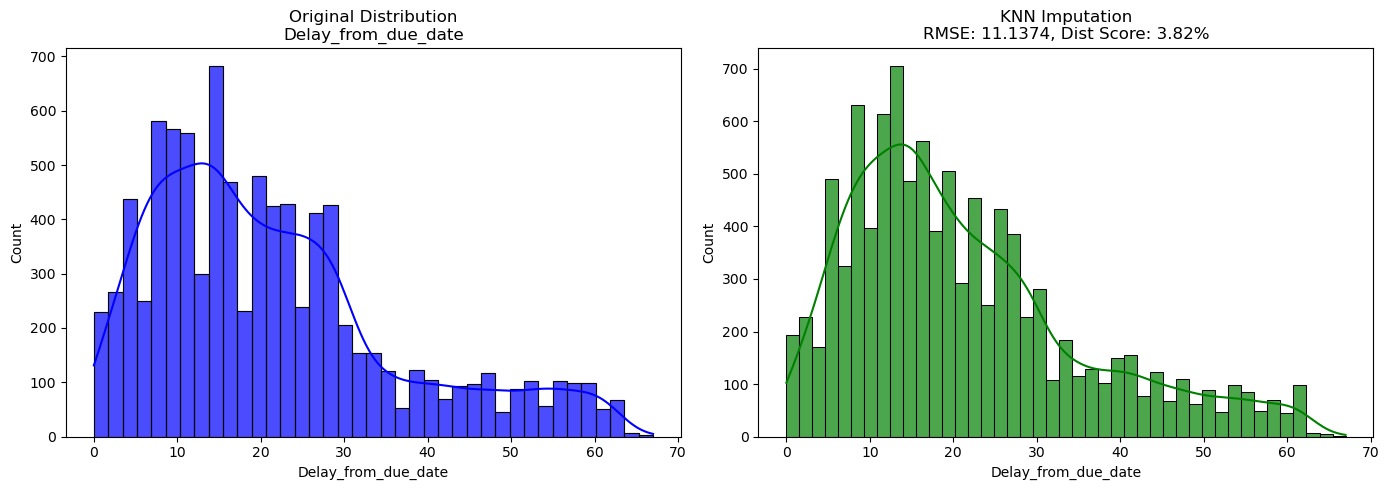


Evaluating KNN imputation (k = 3) for column 'Annual_Income'



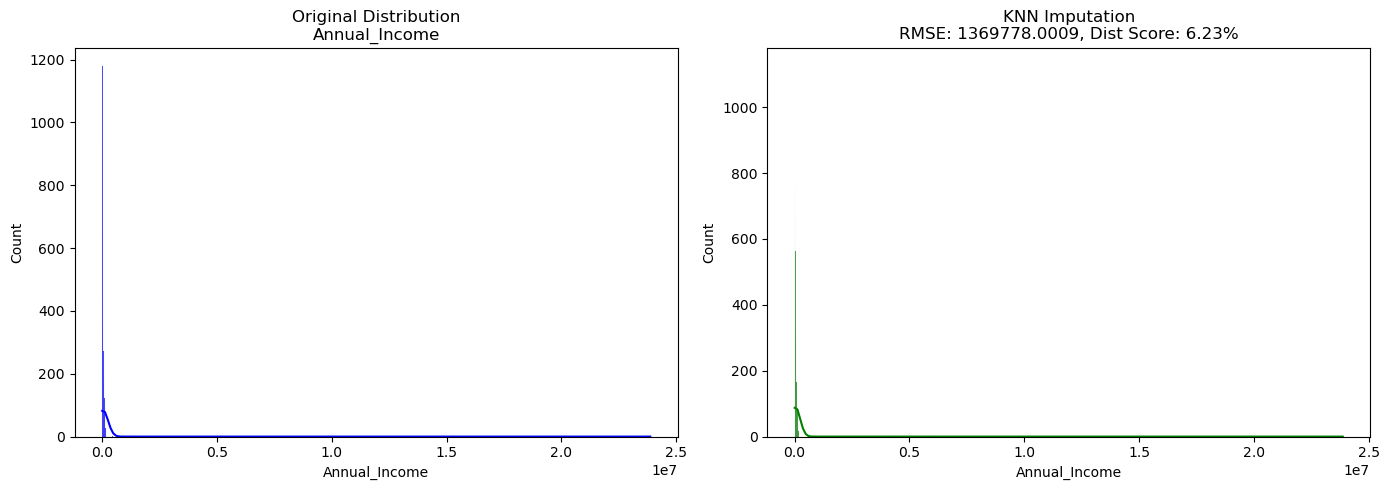


Evaluating KNN imputation (k = 3) for column 'Outstanding_Debt'



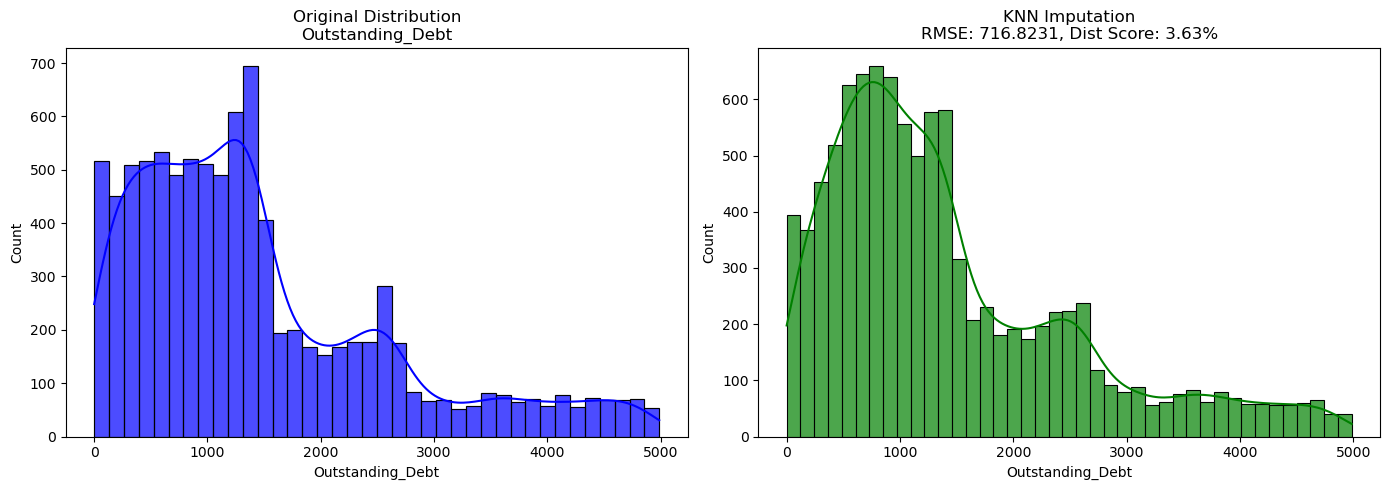

{'Monthly_Inhand_Salary': {'rmse': 3200.9866316333873, 'delta_mean': 0.4602439175089961, 'delta_std': 12.362007140024179, 'delta_25': 20.188793611434335, 'delta_75': 4.939199292629402, 'distribution_score': 9.48756099039923, 'combined_score': 3504.6821906041305}, 'Credit_History_Age': {'rmse': 6.011789861014879, 'delta_mean': 0.34688014856310695, 'delta_std': 6.5288237110269485, 'delta_25': 2.7972027972028024, 'delta_75': 2.207505518763803, 'distribution_score': 2.970103043889165, 'combined_score': 6.190346214669102}, 'Num_of_Delayed_Payment': {'rmse': 241.19478710230314, 'delta_mean': 4.810337232113008, 'delta_std': 8.75116176008278, 'delta_25': 7.407407407407401, 'delta_75': 0.0, 'distribution_score': 5.242226599900797, 'combined_score': 253.83876438935414}, 'Age': {'rmse': 11.151691755635802, 'delta_mean': 0.2962985186574286, 'delta_std': 10.025554593799917, 'delta_25': 8.333333333333332, 'delta_75': 4.761904761904762, 'distribution_score': 5.85427280192386, 'combined_score': 11.804

In [34]:
print(f"Evaluating KNN imputation method for {len(num_columns_with_missing)} numeric columns")
dummy_dataset, results_dict = apply_and_evaluate_knn_imputation(df=dummy_dataset, columns=num_columns_with_missing)

print(results_dict)

In [35]:
# Analyze missing values for numeric features
missing_stats_for_num_features = analyze_missing_values(dummy_dataset[list_numerical_features])
print("\nMissing Value Statistics for Numerical features:\n")
print(missing_stats_for_num_features)



Total features with missing values: 0

Missing Value Statistics for Numerical features:

Empty DataFrame
Columns: [Missing Count, Missing Percentage, Data Type]
Index: []


## Outliers Handling

In [36]:
CONSTRAINTS = {
    'Age':  'domain'    ,  # Domain knowledge-based constraints
    
    'Annual_Income': 'iqr', # Income typically has skewed distribution, IQR works well
    
    'Monthly_Inhand_Salary': 'iqr', 

    'Num_Bank_Accounts':  'domain',

    'Num_Credit_Card':  'domain',

    'Interest_Rate':  'domain',
    
    'Num_of_Loan':  'domain',
    
    'Delay_from_due_date':  'domain',
    
    'Num_of_Delayed_Payment':  'zscore', # Z-score works well for count data
   
    'Changed_Credit_Limit':  'zscore', # Z-score for bidirectional changes (min can be negative)
   
    'Num_Credit_Inquiries':  'domain',
    
    'Outstanding_Debt':  'domain',

    'Credit_Utilization_Ratio':  'domain',
    
    'Credit_History_Age':  'domain',

    'Amount_invested_monthly':  'iqr', 

    'Credit_Score':  'domain',
}

# Features and Correlations Analysis

# Categorical Features Encoding (maybe before than Correlations Aanalysis)

# PARTS THAT CAN BE DONE USING A DUMMY VERSION OF THE DATASET

## Loading Dummy Dataset 

You have 2 options: 

- Running the entire notebook file (so that it is runned the cell created above where the dummy_dataset is created)
- Or loading the dataset with the following script from the folder where i save it

In [37]:
# Loading dummy dataset

import pathlib

script_dir  = pathlib.Path.cwd()              
project_root = script_dir.parent
file_path = project_root / 'data' / 'dummy_dataset' / 'dummy_dataset.csv'

df = load_data(str(file_path))


Loading data from /Users/nando/Documents/GitHub/Credit_Score_Classification/data/dummy_dataset/dummy_dataset.csv
Loaded dataset with 10937 rows and 16 columns


# Checking distribution of the target feature (Credit Score)

Absolute frequencies:
 Credit_Score
2    5745
1    3257
3    1886
0      49
Name: count, dtype: int64

Relative frequencies:
 Credit_Score
2    0.525281
1    0.297796
3    0.172442
0    0.004480
Name: proportion, dtype: float64


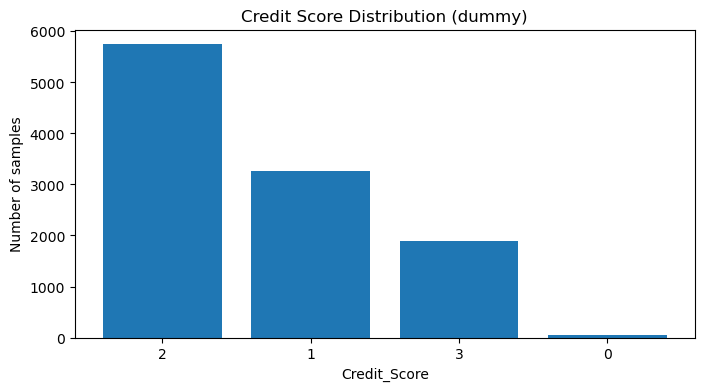

In [38]:

#Keep only numeric columns and drop rows with any NaN
dummy = df.select_dtypes(include=[np.number]) \
          .dropna(axis=0, how='any') \
          .reset_index(drop=True)

#Calculate absolute and relative frequencies of Credit_Score
counts     = dummy['Credit_Score'].value_counts()
rel_counts = dummy['Credit_Score'].value_counts(normalize=True)

print("Absolute frequencies:\n", counts)
print("\nRelative frequencies:\n", rel_counts)

#Plot the distribution
plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Credit_Score')
plt.ylabel('Number of samples')
plt.title('Credit Score Distribution (dummy)')
plt.show()

### Target Distribution Insight & Next Step

We see a severe imbalance in our dummy dataset’s `Credit_Score`:

- Class 2 dominates with 52.5% of the samples  
- Class 1: 29.8%  
- Class 3: 17.2%  
- Class 0 is almost absent at 0.45%  

Such skew will cause any classifier to ignore the rare class 0.  

**Next Step:**  
We will apply an oversampling strategy (e.g. SMOTE or simple bootstrap resampling) to balance all four classes before proceeding to the train/test split and model training.  


# Address Class Imbalance for the target feature (Credit Score)

In [44]:
#Address class imbalance with SMOTE
from imblearn.over_sampling import SMOTE

#Separate features and target
X = dummy.drop('Credit_Score', axis=1)
y = dummy['Credit_Score']

#Instantiate SMOTE
smote = SMOTE(random_state=42)

#Apply SMOTE to generate synthetic minority samples
X_res, y_res = smote.fit_resample(X, y)

#Reconstruct a balanced DataFrame
balanced = pd.concat([
    pd.DataFrame(X_res, columns=X.columns),
    pd.Series(y_res, name='Credit_Score')
], axis=1)

#Verify new class distribution
print("SMOTE-balanced proportions:\n", balanced['Credit_Score'].value_counts(normalize=True))

SMOTE-balanced proportions:
 Credit_Score
3    0.25
2    0.25
1    0.25
0    0.25
Name: proportion, dtype: float64


SMOTE has successfully equalized all four `Credit_Score` classes to 25% each, ensuring no class is under-represented. This will allow our models to learn patterns for every category without bias.

**Next Step:**  
Perform an 80/20 stratified train/test split on the `balanced` DataFrame to preserve these class proportions in both sets before proceeding to model training.


# Data splitting

In [43]:
#Stratified train/test split on the SMOTE-balanced data
from sklearn.model_selection import train_test_split

#Separate features and target
X = balanced.drop('Credit_Score', axis=1)
y = balanced['Credit_Score']

# Perform an 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#Verify that class proportions are maintained
print("Train set class proportions:\n", y_train.value_counts(normalize=True))
print("\nTest set class proportions:\n",  y_test.value_counts(normalize=True))


Train set class proportions:
 Credit_Score
2    0.25
1    0.25
0    0.25
3    0.25
Name: proportion, dtype: float64

Test set class proportions:
 Credit_Score
1    0.25
3    0.25
2    0.25
0    0.25
Name: proportion, dtype: float64


The stratified 80/20 split has preserved the 25% representation of each `Credit_Score` class in both the training and test sets. This ensures that our evaluation will be fair and directly comparable across all categories.

**Next Step:**  
Proceed to **Step 4: Feature Scaling** (using `StandardScaler`) for algorithms sensitive to feature magnitudes, fitting the scaler on `X_train` and transforming both `X_train` and `X_test` before model training.  


## Checking the Distribution of the target variable in the different sets

In [42]:
#Check target distribution in training and test sets post-scaling
import numpy as np

#ince scaling does not change y, we can directly check y_train and y_test
train_vals, train_counts = np.unique(y_train, return_counts=True)
test_vals, test_counts   = np.unique(y_test,  return_counts=True)

print("Training set distribution:")
for cls, cnt in zip(train_vals, train_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_train):.2%})")

print("\nTest set distribution:")
for cls, cnt in zip(test_vals, test_counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_test):.2%})")


Training set distribution:
 Class 0: 4596 samples (25.00%)
 Class 1: 4596 samples (25.00%)
 Class 2: 4596 samples (25.00%)
 Class 3: 4596 samples (25.00%)

Test set distribution:
 Class 0: 1149 samples (25.00%)
 Class 1: 1149 samples (25.00%)
 Class 2: 1149 samples (25.00%)
 Class 3: 1149 samples (25.00%)


We confirm that both `y_train` and `y_test` maintain the 25% proportion for each `Credit_Score` class after scaling. This final check guarantees that no transformations have altered our class balance.



# Feature Scaling: Fit and Transform (or other method)

--> the scaling is necessary only for certain type of models like Logistic Regression. If you implement tree models, like Decision Tree, Random Forest, XGBoost... you can skip this part

In [45]:
# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a scaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and apply the transformation
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Check that each feature in the training set now has mean ~0 and variance ~1
print("Means of scaled features (≈0):", np.round(X_train_scaled.mean(axis=0), 3))
print("Variances of scaled features (≈1):", np.round(X_train_scaled.var(axis=0), 3))


Means of scaled features (≈0): [-0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0.  0.  0. -0.]
Variances of scaled features (≈1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Validation Set

In [46]:
# Import train_test_split for creating a validation set
from sklearn.model_selection import train_test_split
import numpy as np

# Split the scaled training data into a smaller training set and a validation set
# Here we set aside 25% of the original training data as validation
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train_scaled,    # previously scaled training features
    y_train,           # original training labels
    test_size=0.25,    # 25% validation, 75% for new training
    stratify=y_train,  # preserve class proportions
    random_state=42    # ensure reproducibility
)

# Verify class distribution in the validation set
unique, counts = np.unique(y_val, return_counts=True)
print("Validation set distribution:")
for cls, cnt in zip(unique, counts):
    print(f" Class {cls}: {cnt} samples ({cnt/len(y_val):.2%})")


Validation set distribution:
 Class 0: 1149 samples (25.00%)
 Class 1: 1149 samples (25.00%)
 Class 2: 1149 samples (25.00%)
 Class 3: 1149 samples (25.00%)


# From here you can implement all the points (from 5 on) from the link repo I sent on whatsapp in the same order

## Testing models

In [49]:
# Compare training vs. validation accuracy for three models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    'RandomForest':       RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting':   GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC (RBF)':          SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
}

# Train each model and report accuracies
for name, model in models.items():
    # Fit on the new training set
    model.fit(X_train_new, y_train_new)
    
    # Compute training accuracy
    train_acc = accuracy_score(y_train_new, model.predict(X_train_new))
    
    # Compute validation accuracy
    val_acc   = accuracy_score(y_val,       model.predict(X_val))
    
    print(f"{name}:")
    print(f"  Training Accuracy:   {train_acc:.4f}")
    print(f"  Validation Accuracy: {val_acc:.4f}\n")


RandomForest:
  Training Accuracy:   1.0000
  Validation Accuracy: 0.8342

GradientBoosting:
  Training Accuracy:   0.8413
  Validation Accuracy: 0.8085

SVC (RBF):
  Training Accuracy:   0.7932
  Validation Accuracy: 0.7755



**Model Comparison: Training vs. Validation Accuracy**

- **RandomForest**  
  - Training Accuracy: 1.0000  
  - Validation Accuracy: 0.8342  

- **GradientBoosting**  
  - Training Accuracy: 0.8413  
  - Validation Accuracy: 0.8085  

- **SVC (RBF)**  
  - Training Accuracy: 0.7932  
  - Validation Accuracy: 0.7755  

**Insight:**  
RandomForest shows perfect fit on training data but a noticeable drop on validation, suggesting some overfitting. Gradient Boosting is more balanced between training and validation, while SVC exhibits the lowest performance overall.

**Next Step:**  
Tune the **RandomForest** hyperparameters (e.g., `n_estimators`, `max_depth`, `max_features`) using a fast `RandomizedSearchCV` to reduce overfitting and improve validation accuracy.  


# Hyperparameter tuning for the models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Base models to tune
models = {
    'RandomForest':     RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC':              SVC(random_state=42, probability=False)
}

# Broad param distributions for RandomizedSearchCV (5 iterations, 2-fold CV)
rand_spaces = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth':    [None, 10],
        'max_features': ['sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators':  [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth':     [3, 5]
    },
    'SVC': {
        'C':     [0.1, 1.0],
        'gamma': ['scale', 'auto'],
        'kernel':['rbf']
    }
}

# 2-fold stratified CV f
cv_fast = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

best_estimators = {}

for name, base in models.items():
    #Randomized search (n_iter=5)
    rnd = RandomizedSearchCV(
        estimator=base,
        param_distributions=rand_spaces[name],
        n_iter=5,
        scoring='accuracy',
        cv=cv_fast,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    rnd.fit(X_train_new, y_train_new)
    best = rnd.best_params_
    
    #Build a tiny grid around the best params
    grid_space = {k: [v] for k, v in best.items()}
    
    #Grid search to confirm
    grd = GridSearchCV(
        estimator=base,
        param_grid=grid_space,
        scoring='accuracy',
        cv=cv_fast,
        n_jobs=-1,
        verbose=0
    )
    grd.fit(X_train_new, y_train_new)
    
    #Store final estimator
    best_estimators[name] = grd.best_estimator_
    
    print(f"{name} tuned: {grd.best_params_} → {grd.best_score_:.3f}")


RandomForest tuned: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200} → 0.823
GradientBoosting tuned: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200} → 0.824


/Users/nando/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC tuned: {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'} → 0.766


**Hyperparameter Tuning Results**

- **RandomForest**  
  - Tuned parameters: `{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}`  
  - Validation Accuracy: 0.823  

- **GradientBoosting**  
  - Tuned parameters: `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}`  
  - Validation Accuracy: 0.824  

- **SVC (RBF)**  
  - Tuned parameters: `{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}`  
  - Validation Accuracy: 0.766  

**Insight:**  
Gradient Boosting slightly outperforms Random Forest after tuning, while SVC remains behind. Both tree-based ensembles reach ~82–83% validation accuracy.

